# Calibration (C-)

In [5]:
!python -m C_GTOP.calibration CNN_ADNI_ADCN_baseline.csv baseline_calibrated.csv

# Group Threshold Optimization (GTOP)

In [6]:
import pandas as pd
from C_GTOP.gtop  import OptimalThresholdFinder
baseline = pd.read_csv('baseline_calibrated.csv')
baseline = baseline[['participant_id','Split','Train_Val_Test','platt_proba', 'true_label_AD', 'age_group']]
baseline.columns = ['participant_id','Split','Train_Val_Test','proba0', 'true_label_AD', 'age_group']
# Create splits of the baseline dataframe based on the 'Split' column
baseline_splits = {f'baseline_{i}': baseline[baseline['Split'] == i] for i in range(5)}

# Create an instance of the OptimalThresholdFinder class
finder = OptimalThresholdFinder()

# Lists to store results and processed dataframes
all_results_75_84 = []
all_results_85 = []
all_processed_df = []

# Process each dataframe
for df_name, df in baseline_splits.items():
    processed_df, result_75_84, result_85 = finder.process_dataframe(df, df_name)
    all_processed_df.append(processed_df)
    all_results_75_84.append(result_75_84)
    all_results_85.append(result_85)

# Concatenate the processed dataframes
final_processed_df = pd.concat(all_processed_df)

# Create DataFrames from the results
df_results_75_84 = pd.DataFrame(all_results_75_84)
df_results_85 = pd.DataFrame(all_results_85)

# Print the results
print("Results for Age Group 75-84")
print(df_results_75_84.to_string(index=False))

print("\nResults for Age Group 85+")
print(df_results_85.to_string(index=False))

Results for Age Group 75-84
 Dataframe  Optimal Threshold  TN (Default)  FP (Default)  FN (Default)  TP (Default)  Accuracy (Default)  Precision (Default)  Recall (Default)  Balanced Accuracy (Default)  FPR (Default)  FNR (Default)  TN (Optimal)  FP (Optimal)  FN (Optimal)  TP (Optimal)  Accuracy (Optimal)  Precision (Optimal)  Recall (Optimal)  Balanced Accuracy (Optimal)  FPR (Optimal)  FNR (Optimal)
baseline_0           0.545455            22            13             7            39            0.753086             0.750000          0.847826                     0.738199       0.371429       0.152174            24            11             7            39            0.777778             0.780000          0.847826                     0.766770       0.314286       0.152174
baseline_1           0.500000            24            11             5            41            0.802469             0.788462          0.891304                     0.788509       0.314286       0.108696            2

In [7]:
final_processed_df.columns = ['participant_id', 'Split', 'Train_Val_Test', 'platt_proba', 'true_label_AD', 'age_group', 'age_group_num', 'transformed_AD_label']
final_processed_df.to_csv('baseline_c-gtop.csv', index=False)
final_processed_df

,participant_id,Split,Train_Val_Test,platt_proba,true_label_AD,age_group,age_group_num,transformed_AD_label
0,sub-ADNI002S0955,0,Train,NaN,1,75-84,2,NaN
1,sub-ADNI002S1018,0,Train,NaN,1,65-74,1,NaN
2,sub-ADNI003S1059,0,Train,NaN,1,85+,3,NaN
3,sub-ADNI003S4373,0,Train,NaN,1,65-74,1,NaN
4,sub-ADNI005S0221,0,Train,NaN,1,65-74,1,NaN
...,...,...,...,...,...,...,...,...
3325,sub-ADNI153S4125,4,Test,0.348444,0,75-84,2,0.0
3326,sub-ADNI153S4151,4,Test,0.317061,0,65-74,1,0.0
3327,sub-ADNI941S1195,4,Test,0.643493,0,75-84,2,1.0
3328,sub-ADNI941S4255,4,Test,0.287495,0,65-74,1,0.0


# Plot results

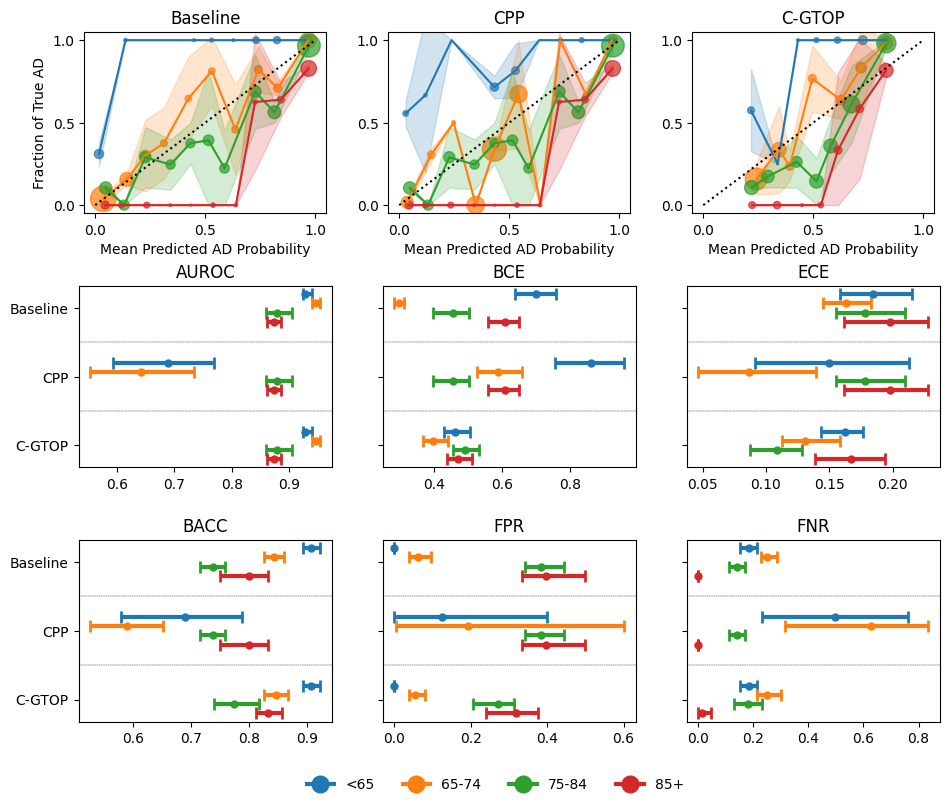

In [8]:
from C_GTOP import plot
# Load the baseline dataset
baseline = pd.read_csv('CNN_ADNI_ADCN_baseline.csv')
# Create the new columns with inverse values
baseline['predicted_label_AD'] = baseline['predicted_label'].apply(lambda x: 1 if x == 0 else 0)
baseline['true_label_AD'] = baseline['true_label'].apply(lambda x: 1 if x == 0 else 0)
# Map age group
baseline['age_group'] = baseline['age_group'].map({'65 to 74': '65-74', '75 to 84': '75-84', 'Less than 65': '<65', 'Greater than 85': '85+'})
# Column names
proba_col = 'proba0'
true_label_col = 'true_label_AD'
pred_label_col = 'predicted_label_AD'
method_name = 'Baseline'
# Process the baseline data and get the stats DataFrame
stats_df_baseline = plot.process_baseline_data(baseline, proba_col, true_label_col, pred_label_col, method_name)

# Load the c-gtop dataset
c_gtop = pd.read_csv('baseline_c-gtop.csv')
# Column names
proba_col = 'platt_proba'
true_label_col = 'true_label_AD'
pred_label_col = 'transformed_AD_label'
method_name = 'C-GTOP'
# Process the baseline data and get the stats DataFrame
stats_df_c_gtop = plot.process_baseline_data(c_gtop, proba_col, true_label_col, pred_label_col, method_name)


# Load the CPP dataset
cpp = pd.read_csv('baseline_cpp.csv')
# Create the new column 'predicted_label_AD_test' based on the condition
cpp['predicted_label_AD_cpp'] = cpp['transformed_proba0'].apply(lambda x: 1 if x >= 0.5 else 0)
# Map age group
cpp['age_group'] = cpp['age_group'].map({'65 to 74': '65-74', '75 to 84': '75-84', 'Less than 65': '<65', 'Greater than 85': '85+'})
# Column names
proba_col = 'transformed_proba0'
true_label_col = 'true_label_AD'
pred_label_col = 'predicted_label_AD_cpp'
method_name = 'CPP'
# Process the baseline data and get the stats DataFrame
stats_df_cpp = plot.process_baseline_data(cpp, proba_col, true_label_col, pred_label_col, method_name)
stacked_df = pd.concat([stats_df_baseline, stats_df_c_gtop, stats_df_cpp], ignore_index=True)

# Prepare data for calibration curves
merge_cols = ['participant_id', 'Train_Val_Test', 'Split', 'age_group']
merged_df_cpp = baseline.merge(cpp[merge_cols + ['transformed_proba0']], on=merge_cols, how='left')
baseline['cpp_proba'] = merged_df_cpp['transformed_proba0']

merged_df_c_gtop = baseline.merge(c_gtop[merge_cols + ['platt_proba']], on=merge_cols, how='left')
baseline['platt_proba_all'] = merged_df_c_gtop['platt_proba']

calibration_df = baseline[baseline['Train_Val_Test'] == 'Test'][['true_label_AD', 'proba0', 'cpp_proba', 'platt_proba_all', 'age_group']]

# Reshape the dataframe using pd.melt
melted_calibration_df = pd.melt(calibration_df, id_vars=['true_label_AD', 'age_group'],
                    value_vars=['proba0', 'cpp_proba', 'platt_proba_all'],
                    var_name='method',
                    value_name='proba')

# Map the method names to the desired labels
method_mapping = {
    'proba0': 'Baseline',
    'cpp_proba': 'CPP',
    'platt_proba_all': 'C-GTOP'
}

# Apply the mapping to the 'method' column
melted_calibration_df['method'] = melted_calibration_df['method'].map(method_mapping)
plot.plot_combined_figure(melted_calibration_df, stacked_df, 'true_label_AD', 'proba','figure_results_VD.pdf')